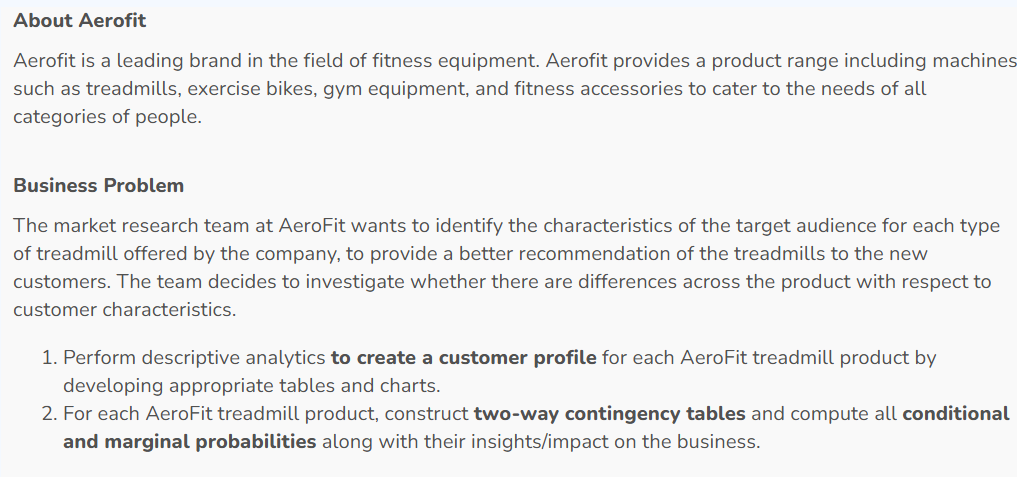

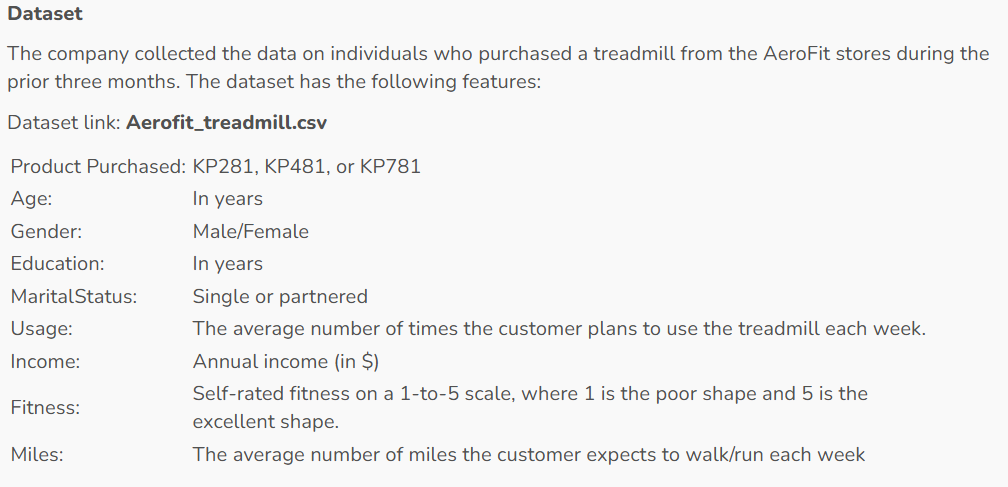

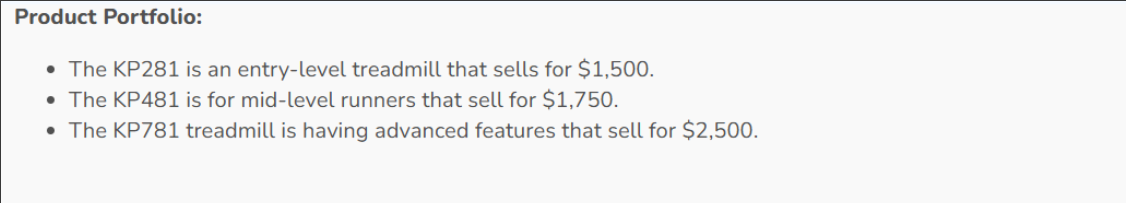

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 180
Number of Columns: 9


In [ ]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


**Observations**:

1. There are no missing values in the data.
2. There are 3 unique products in the dataset.
3. KP281 is the most frequent product.
4. Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
5. Most of the people are having 16 years of education i.e., 75% of persons are having education <= 16 years.
6. Out of 180 data points, 104's gender is Male and rest are the female.
7. Standard deviation for Income & Miles is very high. These variables might have the outliers in it.





## <font color='White'>**Univariate Analysis:**</font>

Understanding the distribution of the data for the quantitative atributes:
1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

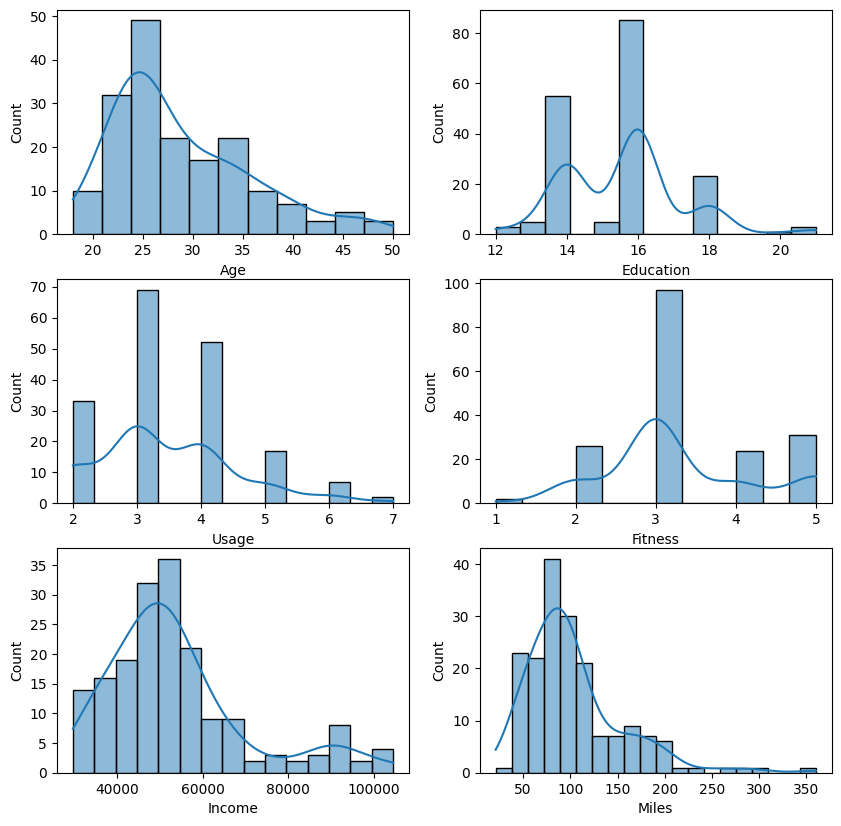

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 7))
fig.subplots_adjust(top=1.2)
sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

Outliers detection using BoxPlots

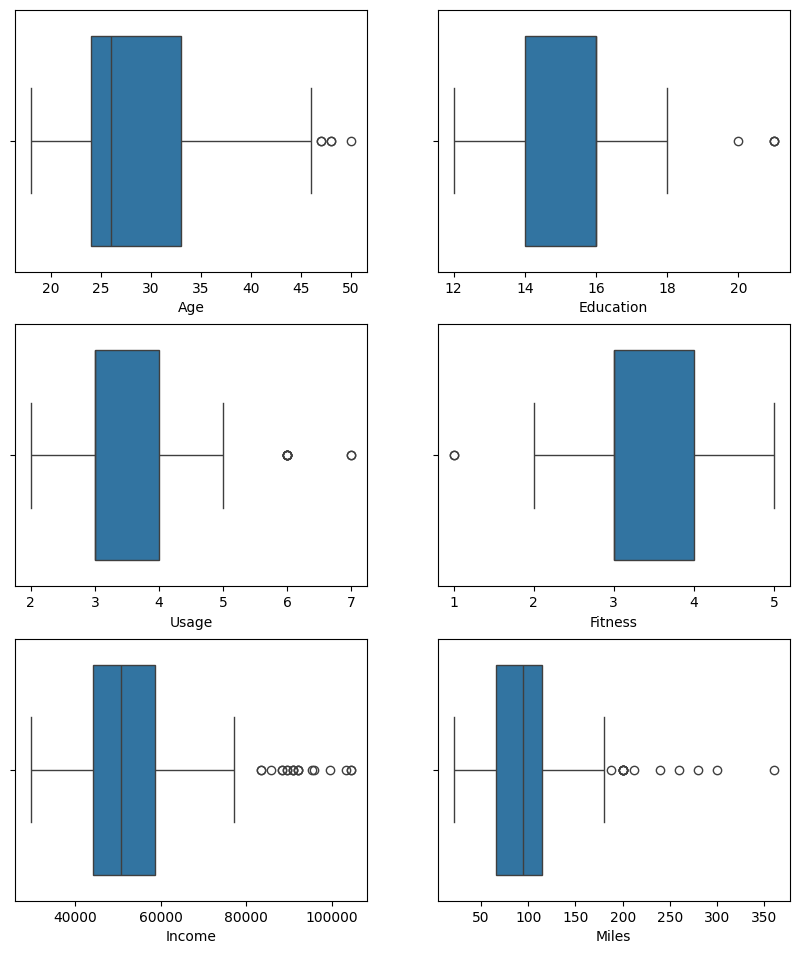

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 9))
fig.subplots_adjust(top=1.1)
sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

**Observations:**

---



Even from the boxplots it is quite clear that:
1. Age, Education and Usage are having very few outliers.
2. While Income and Miles are having more outliers.

Understanding the distribution of the data for the qualitative attributes:
1. Product
2. Gender
3. MaritalStatus

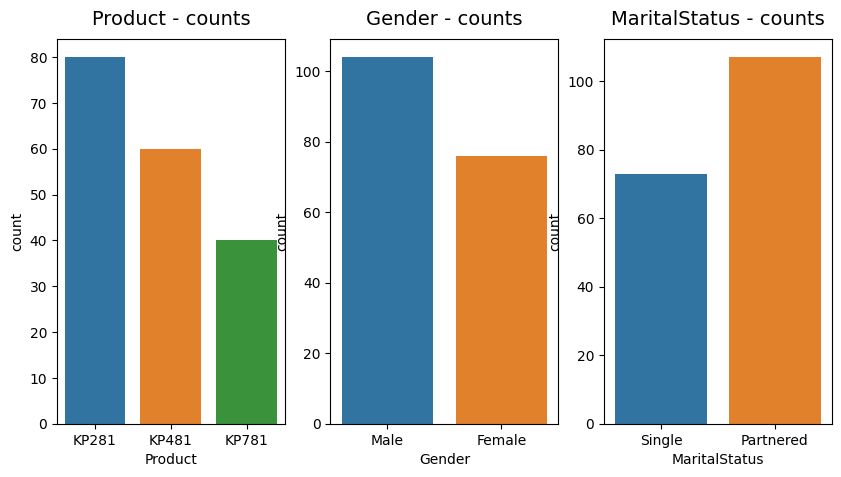

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
sns.countplot(data=df, x='Product', ax=axs[0], hue = 'Product')
sns.countplot(data=df, x='Gender', ax=axs[1], hue = 'Gender')
sns.countplot(data=df, x='MaritalStatus', ax=axs[2], hue = 'MaritalStatus')
axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10,
fontsize=14)
plt.show()

Observations
1. KP281 is the most frequent product.
2. There are more Males in the data than Females.
3. More Partnered persons are there in the data.

Normalized count for each variable is shown below:

In [ ]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

Observations

* Product
1. 44.44% of the customers have purchased KP2821 product.
2. 33.33% of the customers have purchased KP481 product.
3. 22.22% of the customers have purchased KP781 product.


---


* Gender
1. 57.78% of the customers are Male.


---


* MaritalStatus
1. 59.44% of the customers are Partnered.

## <font color='White'>**Bivariate Analysis:**</font>

Checking if features - Gender or MaritalStatus have any effect on the product purchased.

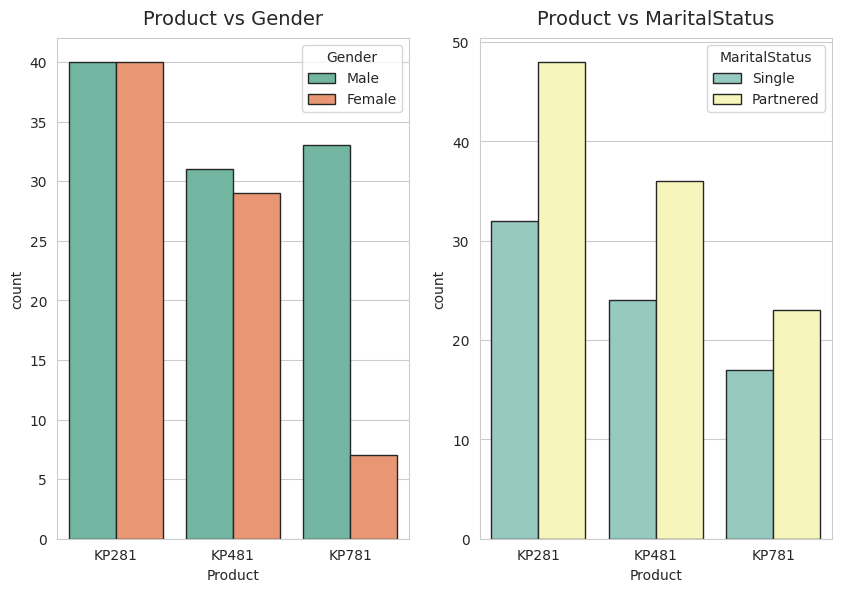

In [ ]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15",
palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus',
edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

**Observations**

*   Product vs Gender

 1. Equal number of males and females have purchased KP281 product and Almost
same for the product KP481
 2. Most of the Male customers have purchased the KP781 product.

* Product vs MaritalStatus
 1. Customer who is Partnered, is more likely to purchase the product.

Checking if following features have any effect on the product purchased:
1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

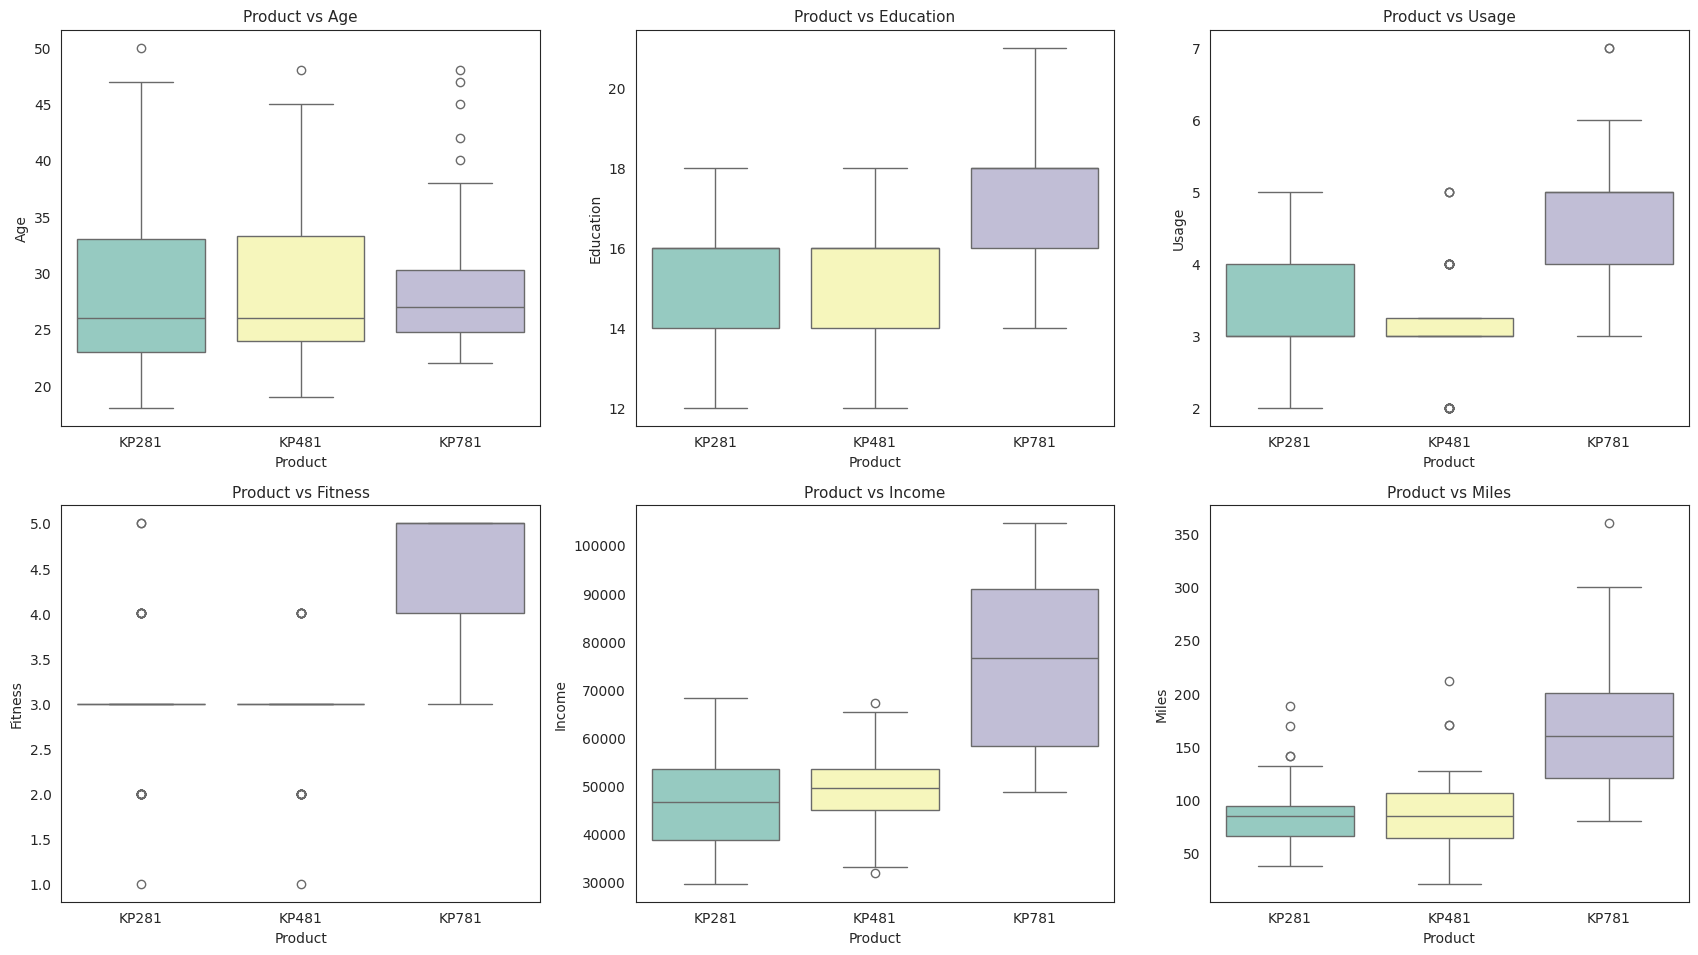

In [ ]:
import warnings

# Hide all future warnings
warnings.filterwarnings("ignore", category=FutureWarning)
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income',
'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(21, 8))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
 for j in range(3):
  sns.boxplot(data=df, x='Product', y=attrs[count],
  ax=axs[i,j], palette='Set3')
  axs[i,j].set_title(f"Product vs {attrs[count]}",
  pad=6, fontsize=11)
  count += 1



1. **Product vs Age**

 * Customers purchasing products KP281 & KP481 are having same Age median
value.

 * Customers whose age lies between 25-30, are more likely to buy KP781 product

2. **Product vs Education**

 * Customers whose Education is greater than 16, have more chances to purchase the KP781 product.

 * While the customers with Education less than 16 have equal chances of
purchasing KP281 or KP481.

3. **Product vs Usage**

 * Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.

 * While the other customers are likely to purchasing KP281 or KP481.

4. **Product vs Fitness**
 * The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

5. **Product vs Income**
   * Higher the Income of the customer (Income >= 60000), higher the chances of
     the customer to purchase the KP781 product.

6. **Product vs Miles**

  * If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

## <font color='White'>**Multivariate Analysis**</font>

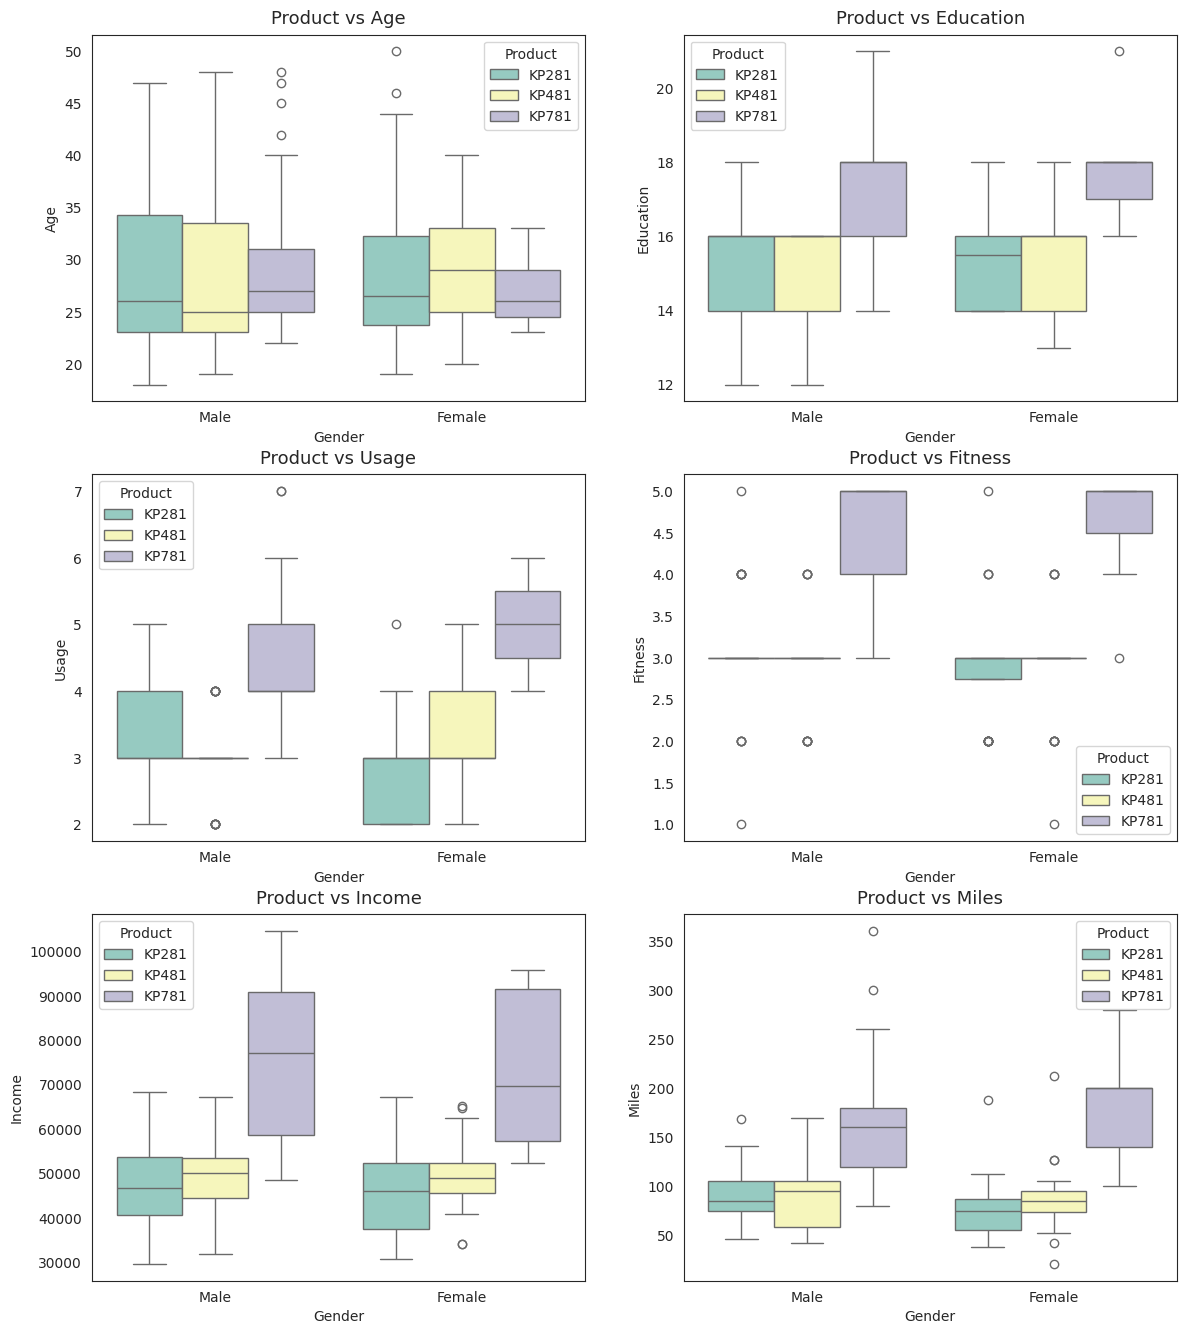

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
fig.subplots_adjust(top=1)
count = 0
for i in range(3):
  for j in range(2):
    sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product',
                ax=axs[i,j], palette='Set3')
    axs[i,j].set_title(f"Product vs {attrs[count]}", pad=8,
                       fontsize=13)
    count += 1

**Observations**

* Females planning to use treadmill 3-4 times a week, are more likely to
buy KP481 product

## <font color='White'>**Computing Marginal & Conditional Probabilities: Marginal Probability:**</font>




In [ ]:
df['Product'].value_counts(normalize=True)

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


<font color='White'> **Conditional Probabilities:** </font>

In [ ]:
import warnings
import pandas as pd


warnings.filterwarnings("ignore", category=SyntaxWarning)

def p_prod_given_gender(gender, print_marginal=False):

    if gender != "Female" and gender != "Male":
        return "Invalid gender value."


    df1 = pd.crosstab(index=df['Gender'], columns=df['Product'])


    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()

    if print_marginal:
        total = len(df)
        print(f"P(Male): {df1.loc['Male'].sum()/total:.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/total:.2f}\n")

    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")


p_prod_given_gender('Male', print_marginal=True)
p_prod_given_gender('Female')


P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



<AxesSubplot:xlabel='Gender', ylabel='Income'>

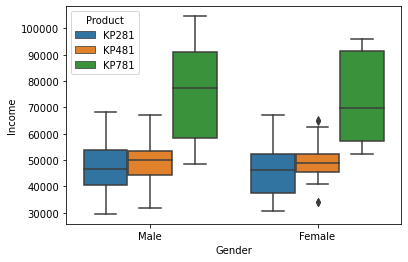

In [ ]:
sns.boxplot(x='Gender', y='Income', hue= 'Product', data=df)

1. Irrespective of Gender, people who are having high income have bought KP781. This shows that the product being expensive is suitable for people having median income > 80000 (Male)

In [ ]:
#removing of outlier is optional


# 1 , 1, 1, 1, 2, 2, 2, 2, 2

<AxesSubplot:xlabel='Gender', ylabel='Education'>

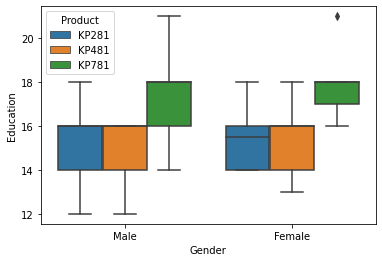

In [ ]:
sbn.boxplot(x='Gender', y='Education', hue= 'Product', data=df)

<AxesSubplot:xlabel='Gender', ylabel='Miles'>

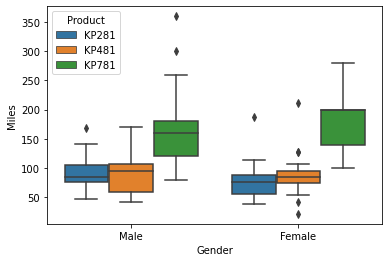

In [ ]:
sbn.boxplot(x='Gender', y='Miles', hue= 'Product', data=df)

<AxesSubplot:xlabel='Miles', ylabel='Income'>

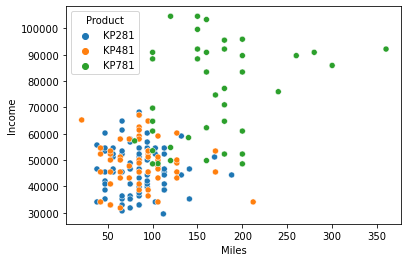

In [ ]:
sbn.scatterplot(x='Miles', y='Income', hue= 'Product', data=df)

<AxesSubplot:>

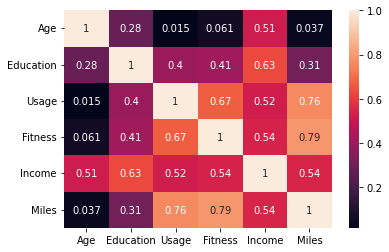

In [ ]:
sbn.heatmap(df.corr(), annot=True) # df.corr() Correlation Values

In [ ]:
#probability  -- jOINT PROB

pd.crosstab (index=df['Gender'], columns=df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [ ]:
#count of males and females buying different version of the product

In [ ]:
pd.crosstab (index=df['Gender'], columns=df['Product'], margins=True, normalize=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


In [ ]:
pd.crosstab (index=df['Gender'], columns=df['Product'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


In [ ]:
#Conditional Prob --> P(Product | Gender)
#Prob of buying KP281, GIVEN THAT IT'S A MALE. --> 0.38

In [ ]:
pd.crosstab (index=df['Gender'], columns=df['Product'], margins=True, normalize='columns')

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778


<font size = 4>🔍 Insights
1. **Customer Gender Distribution by Product**

From the crosstab:
* KP281 is equally preferred by males and females (40 each).
* KP481 and KP781 have slightly higher male preference.
* KP481: 31 males vs 29 females.
* KP781: 33 males vs 7 females – significant male skew.

2. **Joint Probabilities Based on normalized values**:

Overall highest probability of purchase: KP281 (0.444).
* Males: Most likely to buy KP781 (0.183).

* Females: Most likely to buy KP281 (0.222).

3. **Conditional Probabilities**

P(Product | Gender)
* Females: 52.6% chance of buying KP281.
         38.2% for KP481.Least likely to buy KP781 (9.2%).

* Males: Higher chance for KP781 (31.7%) than females.KP281 and KP481 also significant (38.5%, 29.8%). This shows KP781 is strongly male-preferred, while KP281 is more gender-neutral.

P(Gender | Product)
For KP781:

82.5% of buyers are male.

For KP281 and KP481:

Almost equal gender distribution.



✅ Recommendations
1. Product Positioning
   * KP281: Market as a unisex product, since it appeals to both genders equally
   * KP781: Target towards male customers, especially in male-dominated fitness environments or segments.
   * KP481: Consider slightly tailored messaging for males, though gender gap is not extreme.

2. Marketing Strategy
 * Use gender-specific campaigns to push KP781 to males.

 * Promote KP281 as a safe choice for gift purchases or new customers due to balanced appeal.

3. Product Development
 * Consider developing female-oriented features or designs for KP781 to balance the gender disparity.

 * Alternatively, capitalize on its male appeal and enhance features preferred by male users.   

<font size = 4>🧾 Conclusion

Your data analysis reveals clear patterns in product preferences by gender. Using pd.crosstab() with normalization provided:

A solid understanding of joint and conditional probabilities.

Insights into consumer behavior segmentation.

By tailoring product strategies accordingly, Aerofit can better align its marketing, development, and sales efforts to maximize impact.